In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## pyBKT library

In [13]:
!pip install pyBKT
from pyBKT.models import Model



In [14]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/ct.csv", encoding='latin-1')
df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,2269552,3024833,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-256,1,RationalNumberline1,2007-01-17 12:43:38.0,2007-01-17 12:44:07.0,2007-01-17 12:44:13.0,2007-01-17 12:44:13.0,35.00100,NaN,35.00100,0,3,1,1,Plot imperfect radical,4
16853,2269553,3024834,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-124,1,RationalNumberline1,2007-01-17 12:44:17.0,2007-01-17 12:44:37.0,2007-01-17 12:44:42.0,2007-01-17 12:44:42.0,25.00000,NaN,25.00000,0,1,0,1,Plot decimal - thousandths,2
16854,2269555,3024836,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-193,1,RationalNumberline1,2007-01-17 12:44:59.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,17.00000,17.00000,NaN,1,0,0,1,Plot imperfect radical,5
16855,2269557,3024838,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-280,1,RationalNumberline1,2007-01-25 13:46:30.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,22.00000,22.00000,NaN,1,0,0,1,Plot decimal - thousandths,3


In [15]:
df['Anon Student Id'].value_counts()

,count
Anon Student Id,
1T4w47X,84
271np4zc8vd1,68
171s0AHa,66
248iwnoa3,62
171TsMI6,62
...,...
271szevzza4w,3
171N6L94,2
225jFfJy6_a,2


In [16]:
df['KC(Default)'].value_counts()

,count
KC(Default),
Calculate unit rate,5273
Calculate part in proportion with fractions,3358
Calculate total in proportion with fractions,2968
Plot terminating proper fraction,1116
Plot imperfect radical,923
Plot non-terminating improper fraction,726
Plot whole number,590
Plot decimal - thousandths,564
Plot pi,417


In [32]:
model = Model(seed = 42, num_fits = 1)

# Fetch Assistments and CognitiveTutor data (optional - if you have your own dataset, that's fine too!)
data = model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
data = model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [33]:
model.fit(data_path = 'ct.csv')
print(model.params())

                                                               value
skill                                        param   class          
Plot non-terminating improper fraction       prior   default 0.59024
                                             learns  default 0.14616
                                             guesses default 0.16883
                                             slips   default 0.24147
                                             forgets default 0.00000
Plot imperfect radical                       prior   default 0.22330
                                             learns  default 0.12973
                                             guesses default 0.10112
                                             slips   default 0.22205
                                             forgets default 0.00000
Plot terminating proper fraction             prior   default 0.50636
                                             learns  default 0.14004
                                  

In [34]:
preds_df = model.predict(data_path = 'ct.csv')
preds_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,...,Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default),correct_predictions,state_predictions
773,84051,112149,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-014,1,RationalNumberline1,2006-09-07 09:02:46.0,2006-09-07 09:03:11.0,2006-09-07 09:03:27.0,...,NaN,41.00000,0,1,0,1,Plot non-terminating improper fraction,1,0.51689,0.59024
774,84053,112151,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-041,1,RationalNumberline1,2006-09-07 09:03:59.0,2006-09-07 09:10:07.0,2006-09-07 09:13:55.0,...,NaN,596.00000,0,5,1,1,Plot imperfect radical,1,0.25226,0.22330
775,84058,112156,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-104,1,RationalNumberline1,2006-09-07 09:16:53.0,2006-09-07 09:17:33.0,2006-09-07 09:17:35.0,...,NaN,42.00000,0,1,0,1,Plot terminating proper fraction,1,0.48173,0.50636
776,84059,112157,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-122,1,RationalNumberline1,2006-09-07 09:17:41.0,2006-09-07 09:18:11.0,2006-09-07 09:18:11.0,...,30.00000,NaN,1,0,0,1,Plot pi,1,0.67695,0.26272
777,84061,112159,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-180,1,RationalNumberline1,2006-09-07 09:18:29.0,2006-09-07 09:18:44.0,2006-09-07 09:18:44.0,...,15.00000,NaN,1,0,0,1,Plot terminating proper fraction,2,0.44173,0.40755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,232433,310760,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-168,1,EquationAnswer,2006-10-20 09:05:29.0,2006-10-20 09:05:43.0,2006-10-20 09:05:43.0,...,14.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,6,0.86775,0.98830
2005,232445,310772,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-008,1,EquationAnswer,2006-10-20 09:06:41.0,2006-10-20 09:06:46.0,2006-10-20 09:06:46.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,7,0.80079,0.89249
2006,232457,310784,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-115,1,EquationAnswer,2006-10-20 09:07:34.0,2006-10-20 09:07:38.0,2006-10-20 09:07:38.0,...,4.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,7,0.87070,0.99490
2007,232469,310796,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-196,1,EquationAnswer,2006-10-20 09:08:48.0,2006-10-20 09:08:53.0,2006-10-20 09:08:53.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,8,0.85086,0.97523


In [35]:
training_rmse = model.evaluate(data_path = 'ct.csv', metric = 'rmse')
training_rmse




0.4556719885059389

In [37]:
training_auc = model.evaluate(data_path = 'ct.csv', metric = 'auc')
training_auc

0.6998815545699654

In [20]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical")
print(model.params())

                                         value
skill                  param   class          
Plot imperfect radical prior   default 0.23915
                       learns  default 0.13805
                       guesses default 0.08715
                       slips   default 0.23205
                       forgets default 0.00000


In [21]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multigs = True)
print(model.params())

                                               value
skill                  param   class                
Plot imperfect radical prior   default       0.37367
                       learns  default       0.02572
                       guesses RATIONAL1-032 0.20400
                               RATIONAL1-041 0.26934
                               RATIONAL1-054 0.09395
                               RATIONAL1-059 0.10471
                               RATIONAL1-085 0.07721
                               RATIONAL1-089 0.17339
                               RATIONAL1-090 0.16923
                               RATIONAL1-096 0.11179
                               RATIONAL1-137 0.05144
                               RATIONAL1-138 0.00812
                               RATIONAL1-183 0.11875
                               RATIONAL1-184 0.15124
                               RATIONAL1-193 0.10345
                               RATIONAL1-200 0.19185
                               RATIONAL1-212 0

In [22]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multilearn = True)
print(model.params())

                                               value
skill                  param   class                
Plot imperfect radical prior   default       0.27982
                       learns  RATIONAL1-032 0.15138
                               RATIONAL1-041 0.09156
                               RATIONAL1-054 0.16137
                               RATIONAL1-059 0.15261
                               RATIONAL1-085 0.09421
                               RATIONAL1-089 0.16086
                               RATIONAL1-090 0.10907
                               RATIONAL1-096 0.11347
                               RATIONAL1-137 0.15312
                               RATIONAL1-138 0.15026
                               RATIONAL1-183 0.17219
                               RATIONAL1-184 0.11267
                               RATIONAL1-193 0.13742
                               RATIONAL1-200 0.15466
                               RATIONAL1-212 0.14694
                               RATIONAL1-220 0

In [23]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multilearn = "Anon Student Id")
print(model.params())


                                          value
skill                  param   class           
Plot imperfect radical prior   default  0.35787
                       learns  0I891Gg  0.00007
                               17116XP9 0.00002
                               1712bs2B 0.00009
                               1715Zzr7 0.00067
...                                         ...
                       forgets x3A11ty  0.00000
                               xFjwn    0.00000
                               z3GhRzh  0.00000
                               z7Zg3oy  0.00000
                               zt5vuLM  0.00000

[509 rows x 1 columns]


## dummy data to experiment with pybkt


In [24]:

import random

num_students = 50
num_signs = 12
num_rows = 10000
signs = [f"SL_{i+1}" for i in range(num_signs)]
students = [f"S{str(i+1).zfill(2)}" for i in range(num_students)]
hint_types = [0, 1]

In [25]:


# Set initial mastery probabilities for each student (randomized between 0.3 and 0.5)
initial_mastery_probs = {student: random.uniform(0.3, 0.5) for student in students}

# Set the difficulty for each sign (1 to 5 scale, 5 being most difficult)
sign_difficulty = {f"SL_{i+1}": random.randint(1, 5) for i in range(num_signs)}

# Initialize the data with more realistic probabilities
realistic_data = []

for row_id in range(1, num_rows + 1):
    student_id = random.choice(students)
    sign = random.choice(signs)
    difficulty = sign_difficulty[sign]

    # Retrieve the current mastery probability for this student
    mastery_prob = initial_mastery_probs[student_id]

    # Simulate the effect of a hint: if a hint is provided, the likelihood of a correct answer increases
    hint = random.choice(hint_types)
    if hint == 1:
        mastery_prob = min(1, mastery_prob + 0.2)  # Increase mastery probability with a hint

    # Calculate the probability of a correct answer based on mastery and difficulty
    base_prob = max(0.1, mastery_prob - difficulty * 0.05)  # Harder signs reduce the probability
    correct = 1 if random.random() < base_prob else 0  # Simulate the correctness

    # Update the student's mastery probability based on whether they answered correctly
    if correct == 1:
        initial_mastery_probs[student_id] = min(1, mastery_prob + 0.05)  # Gradual increase in mastery

    # Store the row in the data
    realistic_data.append([row_id, student_id, sign, correct, hint])

# Create DataFrame
df_realistic = pd.DataFrame(realistic_data, columns=["row", "student_id", "sign", "correct", "hints"])

# Sort the data by student_id and row to maintain the temporal order
#df_realistic = df_realistic.sort_values(by=["student_id", "row"]).reset_index(drop=True)




In [26]:
df_realistic

,row,student_id,sign,correct,hints
0,1,S34,SL_12,0,1
1,2,S23,SL_1,0,0
2,3,S22,SL_10,0,0
3,4,S18,SL_3,0,0
4,5,S43,SL_10,0,0
...,...,...,...,...,...
9995,9996,S50,SL_2,1,0
9996,9997,S04,SL_4,0,0
9997,9998,S22,SL_8,1,1
9998,9999,S10,SL_7,1,1


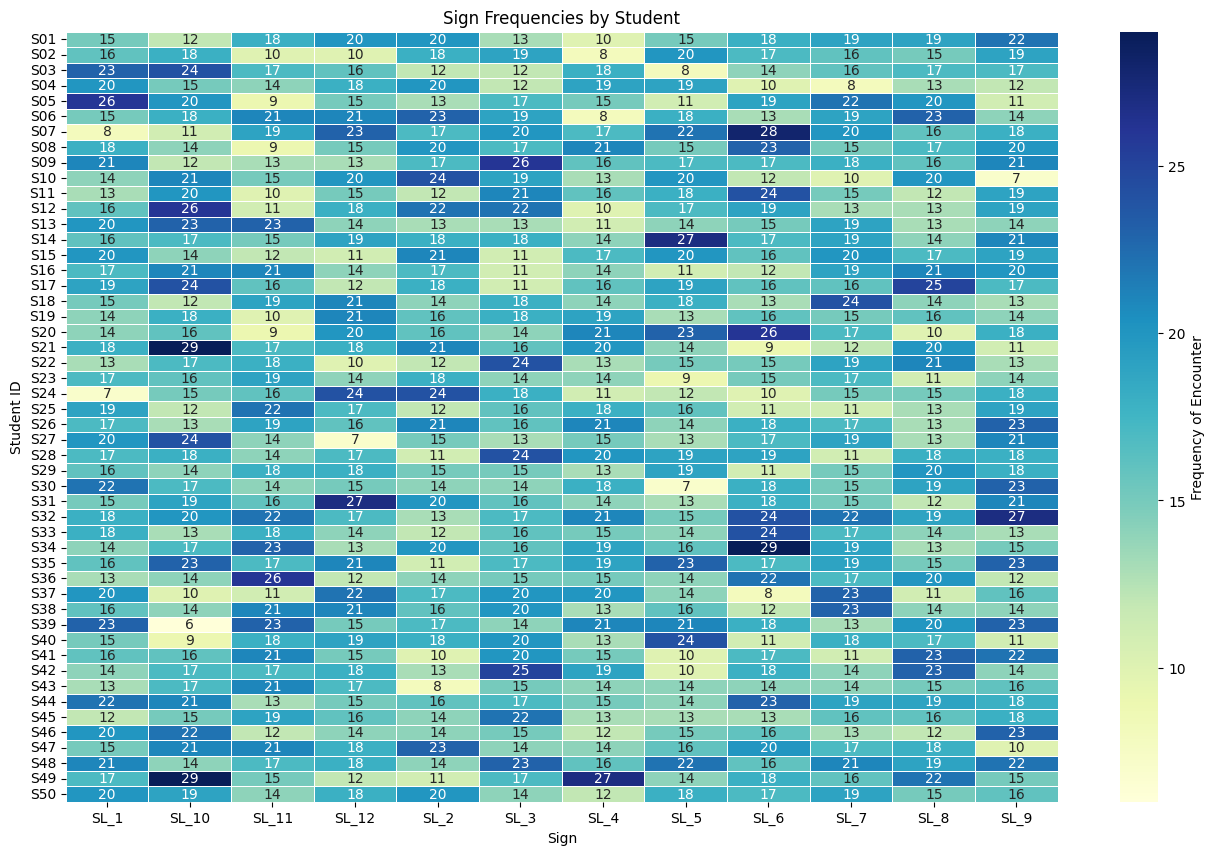

In [27]:

pivot_frequency = df_realistic.pivot_table(index="student_id", columns="sign", values="row", aggfunc="count", fill_value=0)


plt.figure(figsize=(16, 10))
sns.heatmap(pivot_frequency, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Frequency of Encounter'}, linewidths=0.5)
plt.title("Sign Frequencies by Student")
plt.xlabel("Sign")
plt.ylabel("Student ID")
plt.show()


In [28]:
df_realistic.columns

Index(['row', 'student_id', 'sign', 'correct', 'hints'], dtype='object')

In [29]:

defaults = {
    'user_id': 'student_id',
    'order_id': 'row',
    'skill_name': 'sign',
    'correct': 'correct',
}



predicted = model.fit(data=df_realistic, defaults=defaults)


model.params()

value
skill param   class          
SL_11 prior   default 0.75185
      learns  default 0.79256
      guesses default 0.54084
      slips   default 0.08604
      forgets default 0.00000
SL_2  prior   default 0.79037
      learns  default 0.90342
      guesses default 0.14519
      slips   default 0.06109
      forgets default 0.00000
SL_3  prior   default 0.85327
      learns  default 0.83643
      guesses default 0.23055
      slips   default 0.05117
      forgets default 0.00000
SL_5  prior   default 0.78313
      learns  default 0.73612
      guesses default 0.31400
      slips   default 0.06617
      forgets default 0.00000
SL_12 prior   default 0.86286
      learns  default 0.65049
      guesses default 0.04675
      slips   default 0.04852
      forgets default 0.00000
SL_4  prior   default 0.73458
      learns  default 0.82842
      guesses default 0.18126
      slips   default 0.14512
      forgets default 0.00000
SL_7  prior   default 0.34644
      learns  default 0.59700
      guesses default 0.60290
      slips   default 0.09238
      forgets default 0.00000
SL_8  prior   default 0.68450
      learns  default 0.42544
      guesses default 0.55423
      slips   default 0.09507
      forgets default 0.00000
SL_9  prior   default 0.70915
      learns  default 0.93196
      guesses default 0.24144
      slips   default 0.05218
      forgets default 0.00000
SL_6  prior   default 0.75136
      learns  default 0.86842
      guesses default 0.39408
      slips   default 0.05228
      forgets default 0.00000
SL_1  prior   default 0.73085
      learns  default 0.76398
      guesses default 0.32751
      slips   default 0.05222
      forgets default 0.00000
SL_10 prior   default 0.71641
      learns  default 0.67560
      guesses default 0.32350
      slips   default 0.18534
      forgets default 0.00000

In [39]:
!pip list


Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              24.3.0
audioread                          3.0.1
autograd             